✅ Data loaded successfully. Shape: (19912, 73)
✅ Visualization saved to: ../../outputs/figures/07_class_distribution_analysis.png


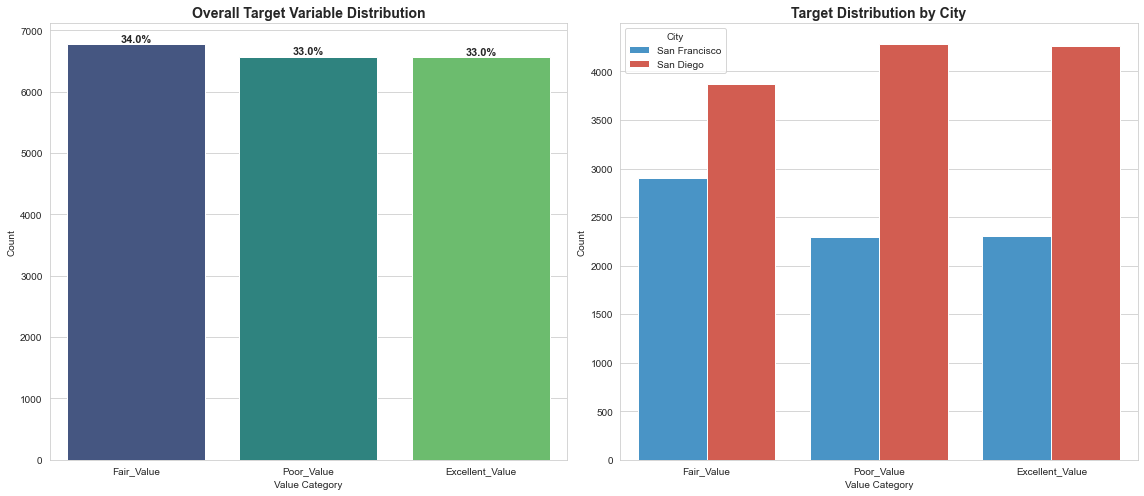


   CLASS IMBALANCE REPORT (T1.17)
Class Counts:
Fair_Value         6773
Poor_Value         6571
Excellent_Value    6568
Name: value_category, dtype: int64

Majority Class: Fair_Value (6773)
Minority Class: Excellent_Value (6568)
Imbalance Ratio: 1 : 1.03
----------------------------------------
RECOMMENDATION:
🟢 DATA IS BALANCED (Ratio < 1.5).
   -> No special sampling techniques required.
   -> Standard accuracy and standard metrics can be used.



In [2]:
# --- Task 1.17: Class Distribution Analysis ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Configuration & Data Loading
# ---------------------------------------------------------
# Path to the file we saved in the previous step
INPUT_FILE = '../../data/processed/listings_with_geo_features.csv'
FIGURES_PATH = '../../outputs/figures/'
os.makedirs(FIGURES_PATH, exist_ok=True)

# Define your Target Column name here (created in T1.13)
# Options might be: 'value_category', 'target', 'fp_score_class'
TARGET_COL = 'value_category' 

try:
    df = pd.read_csv(INPUT_FILE)
    print(f"✅ Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: File not found at {INPUT_FILE}")
    print("Please run the previous Geographic Analysis step to generate this file.")
    df = pd.DataFrame() # Create empty to avoid crashing below

# 2. Visual Analysis
# ---------------------------------------------------------
if not df.empty and TARGET_COL in df.columns:
    
    # Set plotting style
    sns.set_style("whitegrid")
    plt.figure(figsize=(16, 7))

    # --- Chart 1: Overall Class Distribution ---
    plt.subplot(1, 2, 1)
    
    # Calculate order for consistency (e.g., Poor -> Fair -> Excellent)
    # If categories are ordinal, you might want to hardcode the order list
    order_list = df[TARGET_COL].value_counts().index 
    
    ax1 = sns.countplot(x=TARGET_COL, data=df, order=order_list, palette='viridis')
    plt.title('Overall Target Variable Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Value Category')
    plt.ylabel('Count')

    # Add percentage labels
    total = len(df)
    for p in ax1.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax1.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11, fontweight='bold')

    # --- Chart 2: Distribution by City ---
    plt.subplot(1, 2, 2)
    sns.countplot(
        x=TARGET_COL, 
        hue='city_label', 
        data=df, 
        order=order_list,
        palette={'San Francisco': '#3498db', 'San Diego': '#e74c3c'}
    )
    plt.title('Target Distribution by City', fontsize=14, fontweight='bold')
    plt.xlabel('Value Category')
    plt.ylabel('Count')
    plt.legend(title='City')

    plt.tight_layout()
    
    # Save the plot
    save_path = f"{FIGURES_PATH}07_class_distribution_analysis.png"
    plt.savefig(save_path, dpi=300)
    print(f"✅ Visualization saved to: {save_path}")
    plt.show()

    # 3. Imbalance Statistics & Recommendation
    # ---------------------------------------------------------
    print("\n" + "="*40)
    print("   CLASS IMBALANCE REPORT (T1.17)")
    print("="*40)
    
    counts = df[TARGET_COL].value_counts()
    print(f"Class Counts:\n{counts}\n")
    
    majority_class_count = counts.max()
    minority_class_count = counts.min()
    imbalance_ratio = majority_class_count / minority_class_count
    
    print(f"Majority Class: {counts.idxmax()} ({majority_class_count})")
    print(f"Minority Class: {counts.idxmin()} ({minority_class_count})")
    print(f"Imbalance Ratio: 1 : {imbalance_ratio:.2f}")
    
    print("-" * 40)
    print("RECOMMENDATION:")
    
    if imbalance_ratio > 10:
        print("🔴 SEVERE IMBALANCE detected (>1:10).")
        print("   -> Mandatory: Use SMOTE/ADASYN or heavy Class Weights.")
        print("   -> Metric: Do NOT use Accuracy. Use F1-Score, Precision-Recall AUC.")
    elif imbalance_ratio > 1.5:
        print("Dg MODERATE IMBALANCE detected (>1:1.5).")
        print("   -> Advised: Consider SMOTE or 'class_weight=\"balanced\"' in models.")
        print("   -> Metric: Monitor F1-Macro score closely.")
    else:
        print("🟢 DATA IS BALANCED (Ratio < 1.5).")
        print("   -> No special sampling techniques required.")
        print("   -> Standard accuracy and standard metrics can be used.")
    print("="*40 + "\n")

else:
    if df.empty:
        pass # Error already printed
    else:
        print(f"❌ Error: Target column '{TARGET_COL}' not found in dataset.")
        print(f"   Available columns: {df.columns.tolist()}")